**To run the entire notebook:** click Runtime → Run all

In [15]:
!pip install \
  cytotrace2-py==1.1.0.3 \
  seaborn==0.13.2 \
  scanpy==1.11.2 \
  anndata==0.11.4

In [16]:
import warnings
import logging
import matplotlib
from numba.core.errors import NumbaWarning

# suppress the Helvetica font
warnings.filterwarnings("ignore", message="findfont: Font family")
# Suppress font-related messages
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# Suppress the deprecation warning from cytotrace2_py
warnings.filterwarnings(
    "ignore",
    message="pkg_resources is deprecated as an API.*",
    category=UserWarning,
    module="cytotrace2_py.common.gen_utils"
)
# Suppress numba warning
warnings.filterwarnings("ignore", category=NumbaWarning)

In [17]:
import gdown
import numpy
import os
import requests
import pandas as pd
from cytotrace2_py.cytotrace2_py import cytotrace2
import matplotlib.pyplot as plt

In [18]:
os.makedirs("data", exist_ok=True)

In [19]:
outputs = ["data/Cord_blood_CITE_seq_downsampled_expression.txt", "data/Cord_blood_CITE_seq_downsampled_annotation.txt"]
file_ids = ["1EsUXJbqZCx143ELBplC5gOZpQPPfuGXM", "1zAA69hlLTMs1h2UohEAImzJH0eZIdLFg"]
for i, f_id in enumerate(file_ids):
    url = f"https://drive.google.com/uc?id={f_id}"
    # Download only if the file doesn't already exist
    if not os.path.exists(outputs[i]):
        gdown.download(url, outputs[i], quiet=False)
    else:
        print("Dataset already downloaded.")

Dataset already downloaded.
Dataset already downloaded.


In [20]:
# Load expression matrix (genes × cells)
expression = pd.read_csv("data/Cord_blood_CITE_seq_downsampled_expression.txt", sep="\t", index_col=0)
print("Expression shape:", expression.shape)
expression.head()

Expression shape: (20401, 2308)


,TTTATGCGTCCGTTAA,GCATGATCACAACGTT,GGTATTGTCCAGTATG,CGCTTCACAGTGGAGT,TCCCGATTCCTCATTA,CTAGTGATCGAATGGG,GTCACGGCATGTTCCC,TTGTAGGGTGTTGGGA,ATGCGATTCGGTGTTA,AAACGGGCAATCCAAC,...,CATCAGAGTTACAGAA,TTAGGACAGACGACGT,TATGCCCTCTTCTGGC,CTCGGAGCAACACCCG,GCTCCTACACTGAAGG,AGATTGCGTTAGGGTG,AACTTTCTCGACAGCC,TGACAACCAAGCCATT,TTTCCTCGTACCGCTG,TGCCCATAGGATGGAA
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Load annotation matrix (cells x phenotype)
annotation = pd.read_csv("data/Cord_blood_CITE_seq_downsampled_annotation.txt", sep="\t", index_col=0)
print("Annotation shape:", annotation.shape)
annotation.head()

Annotation shape: (2308, 1)


,phenotype
TTTATGCGTCCGTTAA,B cell
GCATGATCACAACGTT,B cell
GGTATTGTCCAGTATG,B cell
CGCTTCACAGTGGAGT,B cell
TCCCGATTCCTCATTA,B cell


cytotrace2: Input parameters
    Input file: data/Cord_blood_CITE_seq_downsampled_expression.txt
    Species: human
    Parallelization enabled: True
    Batch size: 20000
    Smoothing batch size: 1000
    Seed: 14
    Output directory: cytotrace2_results
    Plotting enabled: True
    Verbose mode enabled: True
    User-provided limit for number of cores to use: None
       ...2 cores detected. CytoTRACE 2 will run using up to 1/2 cores.
cytotrace2: Loading dataset
cytotrace2: Dataset characteristics
    Number of input genes:  20401
    Number of input cells:  2308
cytotrace2: Checking models...
All model files are present.
cytotrace2: Computing UMAP embeddings from full expression
cytotrace2: The passed batch_size is greater than the number of cells in the subsample. 
    Now setting batch_size to 2308.
cytotrace2: Preprocessing
cytotrace2: Running 1 prediction batch(es) sequentially using 1 cores per batch.
cytotrace2: Initiated processing batch 1/1 with 2308 cells
    Mapped 1271

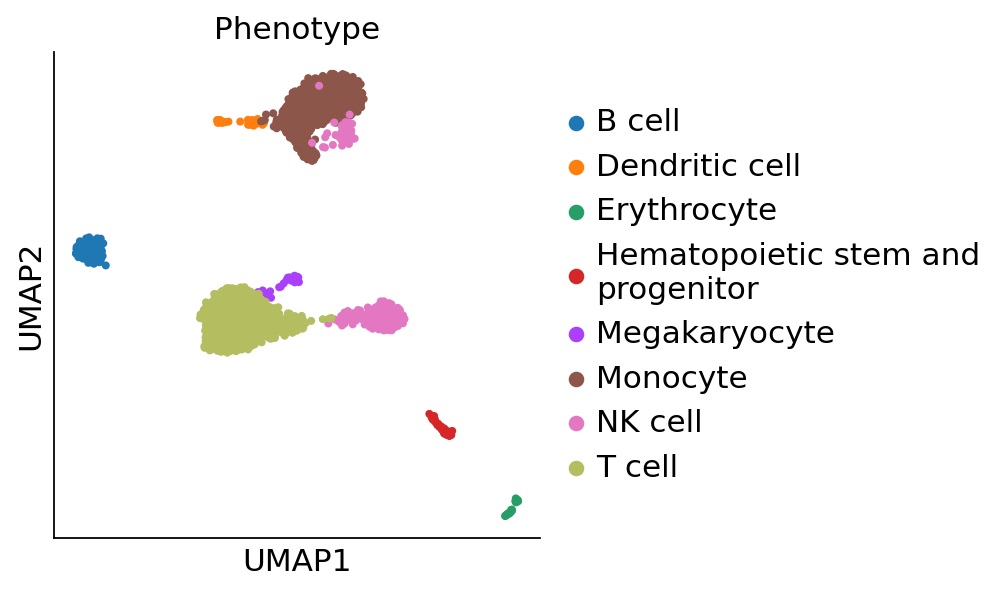

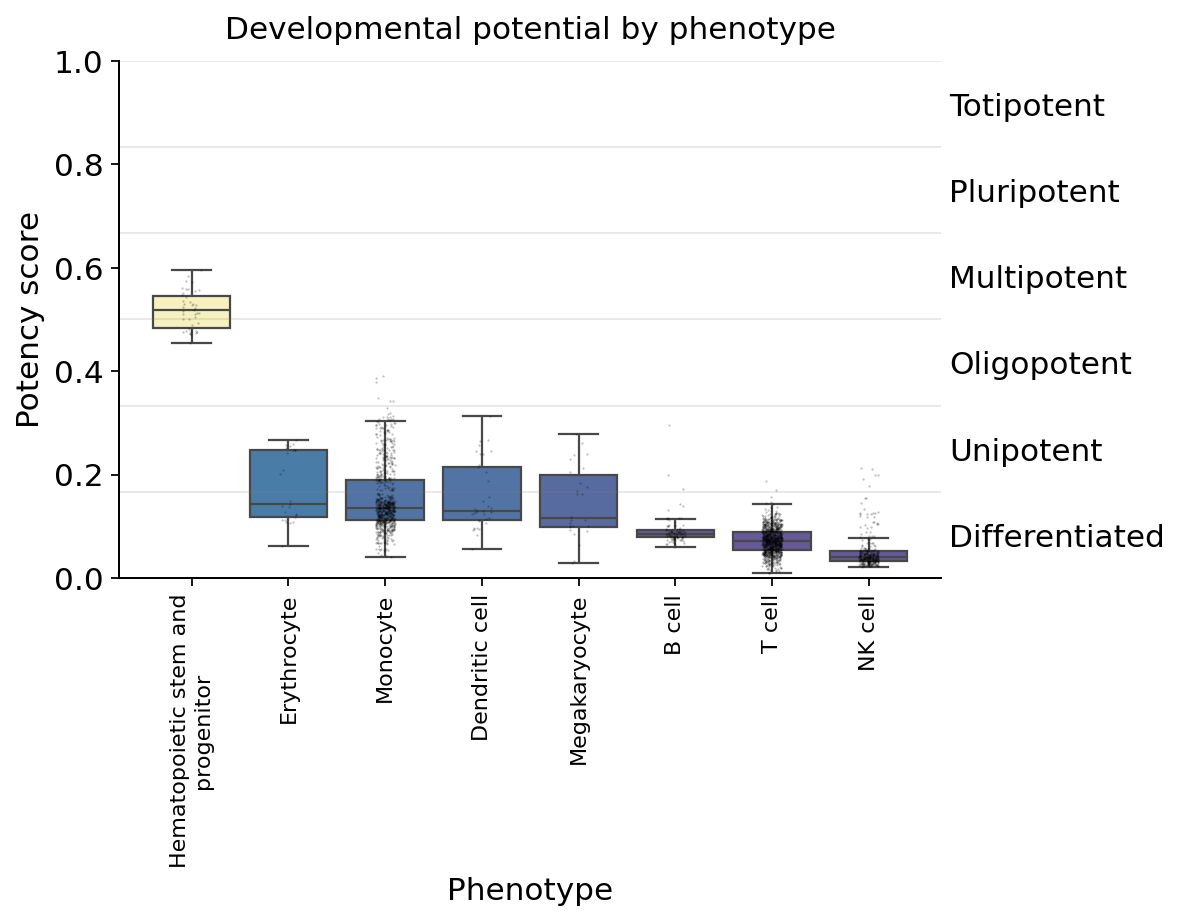

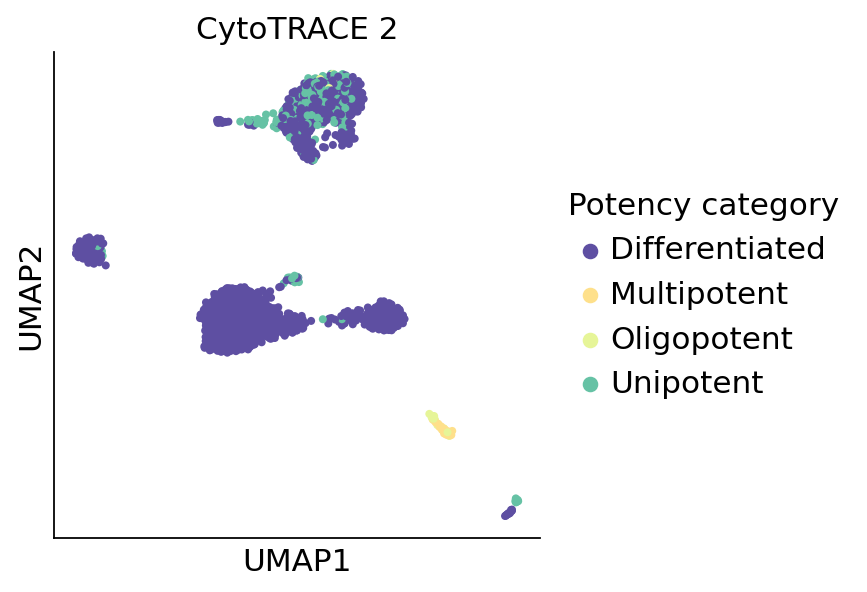

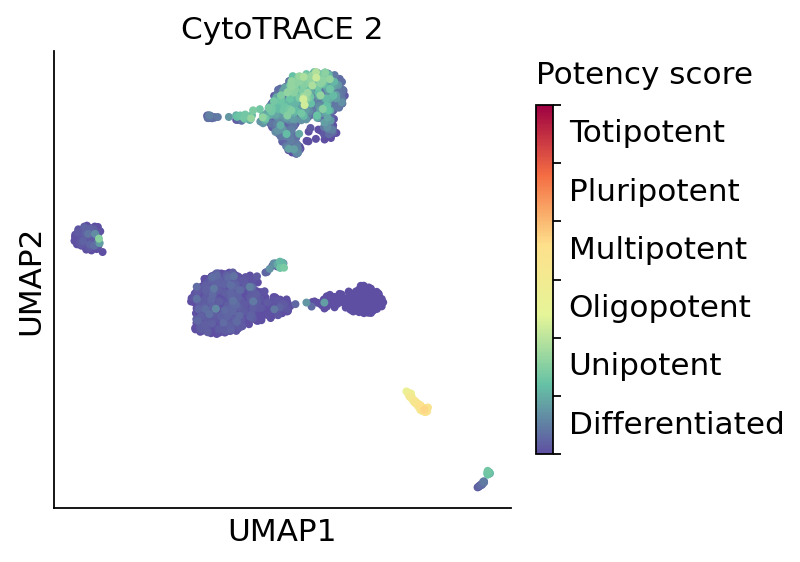

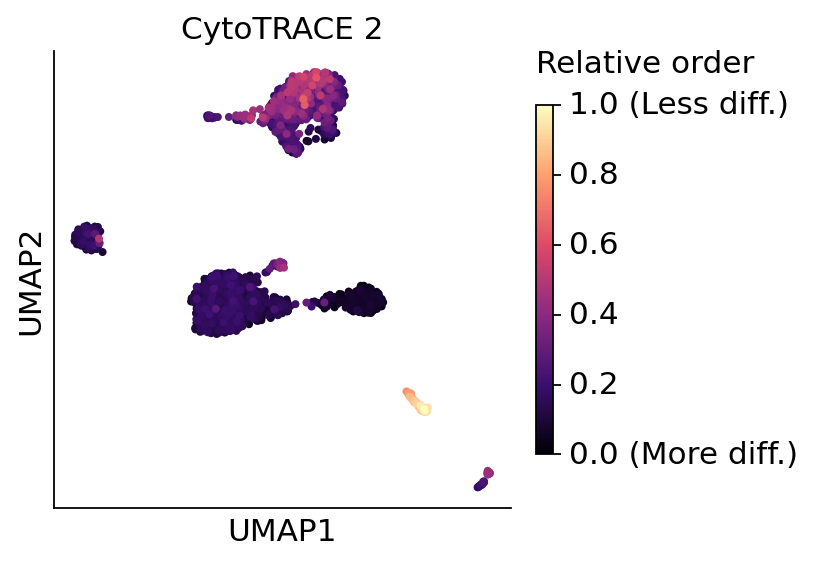

In [23]:
results = cytotrace2("data/Cord_blood_CITE_seq_downsampled_expression.txt", annotation_path="data/Cord_blood_CITE_seq_downsampled_annotation.txt", species="human")